## 2018-04-10
### Processing CORDA output for 5 'best' strains

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
out_dir = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
            "analysis/fba/2018-03-21-clinical-strain-metabolism/"\
            "data/2018-04-11-CORDA-analysis"

In [3]:
os.listdir(out_dir)

['2018-04-11_HM1_UR.csv',
 '2018-04-11_HM56_UTI.tab',
 '2018-04-11_HM6_UTI.tab',
 '2018-04-11_HM6_UR.tab',
 '2018-04-11_HM43_UTI.sbml',
 '2018-04-11_HM68_UTI.tab',
 '2018-04-11_HM14_UR.sbml',
 '2018-04-11_HM68_UR.csv',
 '2018-04-11_HM3_UR.csv',
 '2018-04-11_HM43_UTI.csv',
 '2018-04-11_HM54_UTI.sbml',
 '2018-04-11_HM3_UTI.csv',
 '2018-04-11_HM43_UR.tab',
 '2018-04-11_HM86_UR.tab',
 '2018-04-11_HM1_UTI.csv',
 '2018-04-11_HM3_UTI.sbml',
 '2018-04-11_HM56_UR.csv',
 '2018-04-11_HM86_UTI.tab',
 '2018-04-11_HM54_UR.csv',
 '2018-04-11_HM14_UTI.csv',
 '2018-04-11_HM54_UTI.tab',
 '2018-04-11_HM14_UR.tab',
 '2018-04-11_HM3_UR.sbml',
 '2018-04-11_HM43_UR.sbml',
 '2018-04-11_HM86_UR.csv',
 '2018-04-11_HM6_UR.sbml',
 '2018-04-11_HM56_UR.sbml',
 '2018-04-11_HM68_UTI.sbml',
 '2018-04-11_HM1_UTI.tab',
 '2018-04-11_HM6_UTI.sbml',
 '2018-04-11_HM56_UTI.sbml',
 '2018-04-11_HM56_UR.tab',
 '2018-04-11_HM43_UR.csv',
 '2018-04-11_HM14_UTI.sbml',
 '2018-04-11_HM86_UTI.sbml',
 '2018-04-11_HM14_UR.csv',
 '2018-0

In [4]:
all_reactions = []
for fi in os.listdir(out_dir):
    if ".tab" in fi:
        with open(os.path.join(out_dir, fi), "r") as fh:
            for line in fh:
                reaction = line.rstrip().split("\t")[0]
                all_reactions.append(reaction)
print(len(all_reactions))
all_reactions = set(all_reactions)
print(len(all_reactions))

9257
763


In [8]:
env_rx = {}
for fi in os.listdir(out_dir):
    if "sbml" in fi:
        continue
    elif ".tab" in fi:
        strain = fi.split("2018-04-11_")[1].split(".tab")[0]
    
        has_reaction = []
    
        with open(os.path.join(out_dir, fi), "r") as fh:
            text = fh.read()
        for reaction in all_reactions:
            has_reaction.append(1) if reaction in text else has_reaction.append(0)
        
        env_rx[strain] = has_reaction


In [12]:
df = pd.DataFrame(env_rx, index=all_reactions)
df.head()
df.drop(["HM3_UR"], axis=1, inplace=True)
df.head()
df2 = df.loc[(df.sum(axis=1) != 18),:]
df2.shape

(763, 17)

//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


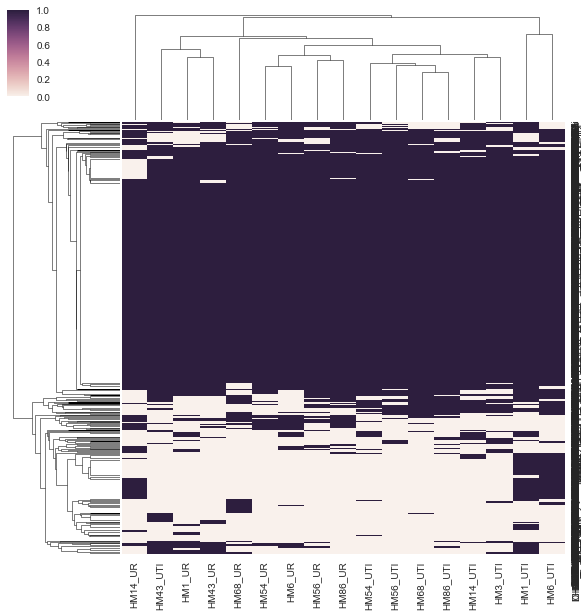

In [13]:
g = sns.clustermap(df2);
g

In [ ]:
def visSims(simulation):
   
    num_colors = len(pg.unique())
    colors = [mpl.cm.Set3(1.*i/9) for i in range(1, num_colors +1)]
    lut = dict(zip(pg.unique(), colors))
    row_colors = pg.map(lut)
    strain_cluster = scipy.cluster.hierarchy.linkage(simulation.T)
    cmap = mpl.colors.ListedColormap(["#f7f7f7", "#3b5998"])
     
    g = sns.clustermap(simulation,row_colors=row_colors, cmap=cmap,  cbar_kws={"ticks":[0,1]});
    #g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation = 0, fontsize = 8);
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 16);

    g.ax_col_dendrogram.set_visible(False)
    legend = [mpl.patches.Patch(color=c, label=l) for l,c in lut.items()]
    l2=g.ax_heatmap.legend(handles=legend, bbox_to_anchor=(-0.25,0.15))
    #l2=g.ax_heatmap.legend(loc='lower left',handles=legend,frameon=True)
    l2.set_title(title='Phylogroup',prop={'size':10})
    #map = mpl.colors.ListedColormap(["#f7f7f7","#3b5998"])
    #g = sns.clustermap(simulation,  col_cluster=False, cmap=cmap);
    
    g.savefig("../data/2018-04-10-growth-simulations.png", dpi=300)
    return g

In [44]:
ur_reactions = {}

for fi in ur_files:
    df = pd.read_csv(os.path.join(out_dir, fi), sep='\t', index_col=0)
    for i in df.index:
        ur_reactions[i] = ur_reactions.get(i, 0) + 1
        
ur_reactions
ur_all_models = [k for k in ur_reactions.keys() if ur_reactions[k]== 5]
ur_all_models
    

['3OAR140',
 '3OAS140',
 '4HTHRA',
 '4HTHRK',
 '5DOAN',
 'A5PISO',
 'ACCOAC',
 'ACGK',
 'ACGS',
 'ACHBS',
 'ACKr',
 'ACLS',
 'ACODA',
 'ACONTa',
 'ACONTb',
 'ACOTA',
 'ADCL',
 'ADCS',
 'ADNK1',
 'ADSK',
 'ADSL1r',
 'ADSL2r',
 'ADSS',
 'AGPAT160',
 'AGPAT161',
 'AGPR',
 'AHCYSNS',
 'AICART',
 'AIRC2',
 'AIRC3',
 'AKGDH',
 'ALAALAr',
 'ALAR',
 'AMAOTr',
 'AMPMS2',
 'ANPRT',
 'ANS',
 'AOXSr2',
 'APRAUR',
 'ARGSL',
 'ARGSS',
 'ASAD',
 'ASNS2',
 'ASP1DC',
 'ASPCT',
 'ASPK',
 'ASPT',
 'ASPTA',
 'ATPM',
 'ATPPRT',
 'BIOMASS_Ec_iML1515_core_75p37M',
 'BPNT',
 'BTS5',
 'CA2tex',
 'CAt6pp',
 'CBPS',
 'CDPMEK',
 'CHORM',
 'CHORS',
 'CHRPL',
 'CLt3_2pp',
 'CLtex',
 'CO2tpp',
 'COBALT2tex',
 'COBALT2tpp',
 'CPPPGO',
 'CS',
 'CTPS2',
 'CU2tex',
 'CU2tpp',
 'CYSS',
 'CYSTL',
 'CYTK1',
 'DALAt2pp',
 'DAPDC',
 'DAPE',
 'DASYN160',
 'DASYN161',
 'DB4PS',
 'DBTS',
 'DDPA',
 'DHAD1',
 'DHAD2',
 'DHDPRy',
 'DHDPS',
 'DHFR',
 'DHFS',
 'DHGLYH',
 'DHNPA2r',
 'DHORTS',
 'DHPPDA2',
 'DHPS2',
 'DHPTDCs2',
 'DHQ

In [45]:
uti_reactions = {}

for fi in uti_files:
    df = pd.read_csv(os.path.join(out_dir, fi), sep='\t', index_col=0)
    for i in df.index:
        uti_reactions[i] = uti_reactions.get(i, 0) + 1
        
uti_reactions
uti_all_models = [k for k in uti_reactions.keys() if uti_reactions[k] == 5]
uti_all_models

['3HAD120',
 '3HAD121',
 '3HAD140',
 '3HAD141',
 '3HAD160',
 '3HAD161',
 '3HAD40',
 '3HAD60',
 '3HAD80',
 '3OAR100',
 '3OAR120',
 '3OAR121',
 '3OAR140',
 '3OAR141',
 '3OAR160',
 '3OAR161',
 '3OAR40',
 '3OAR60',
 '3OAR80',
 '3OAS100',
 '3OAS120',
 '3OAS121',
 '3OAS140',
 '3OAS141',
 '3OAS160',
 '3OAS161',
 '3OAS60',
 '3OAS80',
 '5DOAN',
 'A5PISO',
 'ACCOAC',
 'ACGK',
 'ACGS',
 'ACHBS',
 'ACKr',
 'ACLS',
 'ACODA',
 'ACONTa',
 'ACONTb',
 'ACOTA',
 'ADCL',
 'ADCS',
 'ADNK1',
 'ADSK',
 'ADSL1r',
 'ADSL2r',
 'ADSS',
 'AGPAT160',
 'AGPAT161',
 'AGPR',
 'AHCYSNS',
 'AICART',
 'AIRC2',
 'AIRC3',
 'AKGDH',
 'ALAALAr',
 'ALAR',
 'ALATA_L',
 'AMAOTr',
 'AMPMS2',
 'ANPRT',
 'ANS',
 'AOXSr2',
 'APRAUR',
 'ARGSL',
 'ARGSS',
 'ASAD',
 'ASNS2',
 'ASP1DC',
 'ASPCT',
 'ASPK',
 'ASPTA',
 'ATPM',
 'ATPPRT',
 'BIOMASS_Ec_iML1515_core_75p37M',
 'BPNT',
 'BTS5',
 'CA2tex',
 'CAt6pp',
 'CDPMEK',
 'CHORM',
 'CHORS',
 'CHRPL',
 'CLt3_2pp',
 'CLtex',
 'CO2tex',
 'CO2tpp',
 'COBALT2tex',
 'COBALT2tpp',
 'CS',
 'CT

In [43]:
set(uti_all_models) - set(ur_all_models)

{'3HAD120',
 '3HAD121',
 '3HAD140',
 '3HAD141',
 '3HAD160',
 '3HAD161',
 '3HAD40',
 '3HAD60',
 '3HAD80',
 '3OAR100',
 '3OAR120',
 '3OAR121',
 '3OAR141',
 '3OAR160',
 '3OAR161',
 '3OAR40',
 '3OAR60',
 '3OAR80',
 '3OAS100',
 '3OAS120',
 '3OAS121',
 '3OAS141',
 '3OAS160',
 '3OAS161',
 '3OAS60',
 '3OAS80',
 'ALATA_L',
 'CO2tex',
 'CYTBO3_4pp',
 'E4PD',
 'EX_co2_e',
 'GND',
 'KAS15',
 'MDH',
 'MG2t3_2pp',
 'OHPBAT',
 'OPHHX3',
 'PDX5PO2',
 'PERD',
 'T2DECAI',
 'TRPS1'}

In [ ]:
def invnorm(x):
    return scipy.stats.norm.ppf((x.rank() -0.5)/x.count())

In [ ]:
HM01_UTI_counts["invNORM_counts"] = invnorm(HM01_UTI_counts.HM01_UTI_RPKM)
HM01_UTI_counts.head()